Small version CNN VGG network

In [47]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlibe inline

def Analyze_training(h):
# summarize history for accuracy
   plt.plot(h.history['acc'])
   plt.plot(h.history['val_acc'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

UsageError: Line magic function `%matplotlibe` not found.


Read Dataset (print 3 samples)

In [38]:
((X_train, y_train), (X_test, y_test)) = fashion_mnist.load_data()
# Dataset Summary
print('Train: ', X_train.shape, y_train.shape)
print('Test: ',  X_test.shape, y_test.shape)
# plot first 6  images
for i in range(6):
   plt.subplot(330 + 1 + i)
   plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

Train:  (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


Data preparation reshape single color scale and hot encode labels

In [39]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test  = X_test.reshape((X_test.shape[0], 28, 28, 1))
# one hot encode labels
print("before",y_test.shape)
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
# are numbers float? just make sure
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')
# normalize 
X_train = train_norm / 255.0
X_test = test_norm / 255.0
print(y_test.shape)

before (10000,)
(10000, 10)


CNN Network

In [40]:
def define_CNN():
   model = Sequential()
   model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
   model.add(MaxPooling2D((2, 2)))
   model.add(Flatten())
   model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
   model.add(Dense(10, activation='softmax'))

   opt = SGD(lr=0.01, momentum=0.9)
   model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
   model.summary()
   return model

In [41]:
model = define_CNN()
print("---",X_train.shape, y_train.shape)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test,y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
# append scores

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1254500   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 1,256,150
Trainable params: 1,256,150
Non-trainable params: 0
_________________________________________________________________
--- (60000, 28, 28, 1) (60000, 10)
> 91.130


In [46]:
print("accuracy :", acc)
Analyze_training(history)


accuracy : 0.9113


    Use classifier with an image

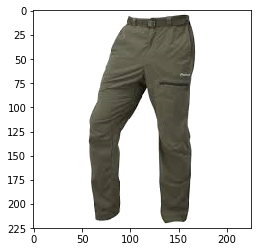

0


In [58]:
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.image as mpimg
%matplotlib inline

filename = "e:/$Notebooks/DAL_Workshop/pants.png"
img = load_img(filename, grayscale=True, target_size=(28, 28))

# convert to array
img1 = img_to_array(img)
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(1, 28, 28, 1)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0
photo =mpimg.imread(filename)
imgplot = plt.imshow(photo)
plt.show()
# load an image and predict the class
# load the image
result = model.predict_classes(img)
print(result[0])

0 T-shirt/top
1 Trouser/pants
2 Pullover shirt
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
